# Importing Libraries

In [1]:
# Data Manipulation, Linear Algebra
import numpy as np
import pandas as pd

# Plots
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", font_scale=1.5)

# Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

## Loading Data and Preprocessing

In [2]:
data = pd.read_csv('/kaggle/input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv')
data.head()

Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [4]:
data.dtypes
#df.isnull().sum()

Unnamed: 0                  int64
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [5]:
# Conversion of data that alogorithm can perform 

data["Title"] = data["Title"].astype('category')
data["Review Text"] = data["Review Text"].astype('category')
data["Division Name"] = data["Division Name"].astype('category')
data["Department Name"] = data["Department Name"].astype('category')
data["Class Name"] = data["Class Name"].astype('category')
data.dtypes

Unnamed: 0                    int64
Clothing ID                   int64
Age                           int64
Title                      category
Review Text                category
Rating                        int64
Recommended IND               int64
Positive Feedback Count       int64
Division Name              category
Department Name            category
Class Name                 category
dtype: object

In [6]:
data["Title"] = data["Title"].cat.codes
data["Review Text"] = data["Review Text"].cat.codes
data["Division Name"] = data["Division Name"].cat.codes
data["Department Name"] = data["Department Name"].cat.codes
data["Class Name"] = data["Class Name"].cat.codes

In [7]:
data.head()

Unnamed: 0  Clothing ID  Age  Title  Review Text  Rating  Recommended IND  \
0           0          767   33     -1          245       4                1   
1           1         1080   34     -1        13177       5                1   
2           2         1077   60  11448         4925       3                0   
3           3         1049   50   8052         7405       5                1   
4           4          847   47   4362        20322       5                1   

   Positive Feedback Count  Division Name  Department Name  Class Name  
0                        0              2                2           5  
1                        4              0                1           3  
2                        0              0                1           3  
3                        0              1                0          13  
4                        6              0                4           0

In [8]:
data.dtypes

Unnamed: 0                 int64
Clothing ID                int64
Age                        int64
Title                      int16
Review Text                int16
Rating                     int64
Recommended IND            int64
Positive Feedback Count    int64
Division Name               int8
Department Name             int8
Class Name                  int8
dtype: object

In [9]:
# Droping column which are not of any use

data.drop('Unnamed: 0',
   axis='columns', inplace=True)


data.head()

Clothing ID  Age  Title  Review Text  Rating  Recommended IND  \
0          767   33     -1          245       4                1   
1         1080   34     -1        13177       5                1   
2         1077   60  11448         4925       3                0   
3         1049   50   8052         7405       5                1   
4          847   47   4362        20322       5                1   

   Positive Feedback Count  Division Name  Department Name  Class Name  
0                        0              2                2           5  
1                        4              0                1           3  
2                        0              0                1           3  
3                        0              1                0          13  
4                        6              0                4           0

## Checking for Null Values in the Dataset

In [10]:
data.isnull().sum()

Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

### Great! We Dont have any Null values

In [11]:
data.describe()

Clothing ID           Age         Title   Review Text        Rating  \
count  23486.000000  23486.000000  23486.000000  23486.000000  23486.000000   
mean     918.118709     43.198544   5802.888742  10909.525036      4.196032   
std      203.298980     12.279544   4428.810884   6752.220626      1.110031   
min        0.000000     18.000000     -1.000000     -1.000000      1.000000   
25%      861.000000     34.000000   1426.250000   5025.250000      4.000000   
50%      936.000000     41.000000   5709.500000  10895.500000      5.000000   
75%     1078.000000     52.000000   9585.000000  16761.750000      5.000000   
max     1205.000000     99.000000  13992.000000  22633.000000      5.000000   

       Recommended IND  Positive Feedback Count  Division Name  \
count     23486.000000             23486.000000   23486.000000   
mean          0.822362                 2.535936       0.473048   
std           0.382216                 5.702202       0.615132   
min           0.000000                 0.000000      -1.000000   
25%           1.000000                 0.000000       0.000000   
50%           1.000000                 1.000000       0.000000   
75%           1.000000                 3.000000       1.000000   
max           1.000000               122.000000       2.000000   

       Department Name    Class Name  
count     23486.000000  23486.000000  
mean          2.356212      6.929958  
std           1.633114      5.211547  
min          -1.000000     -1.000000  
25%           1.000000      3.000000  
50%           2.000000      7.000000  
75%           4.000000     10.000000  
max           5.000000     19.000000

# EDA and Statistical Analysis

## Simple Distribution Plots for all Features

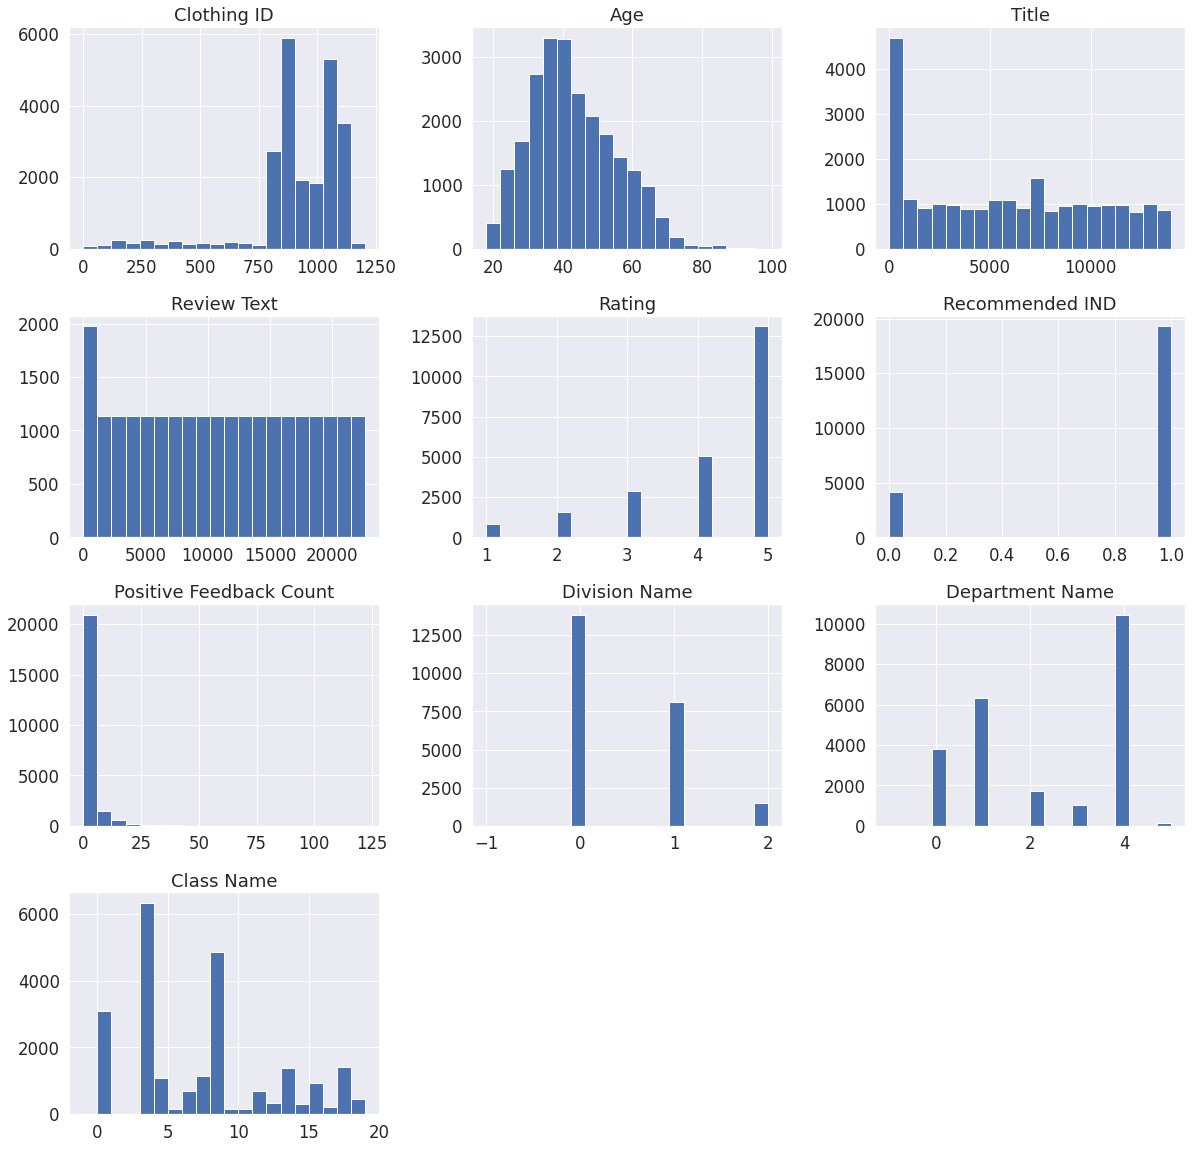

In [12]:
plt.rcParams["figure.figsize"] = (20, 20)
data.hist(bins=20)
plt.show()

## Pair Plot to Compare All Variables

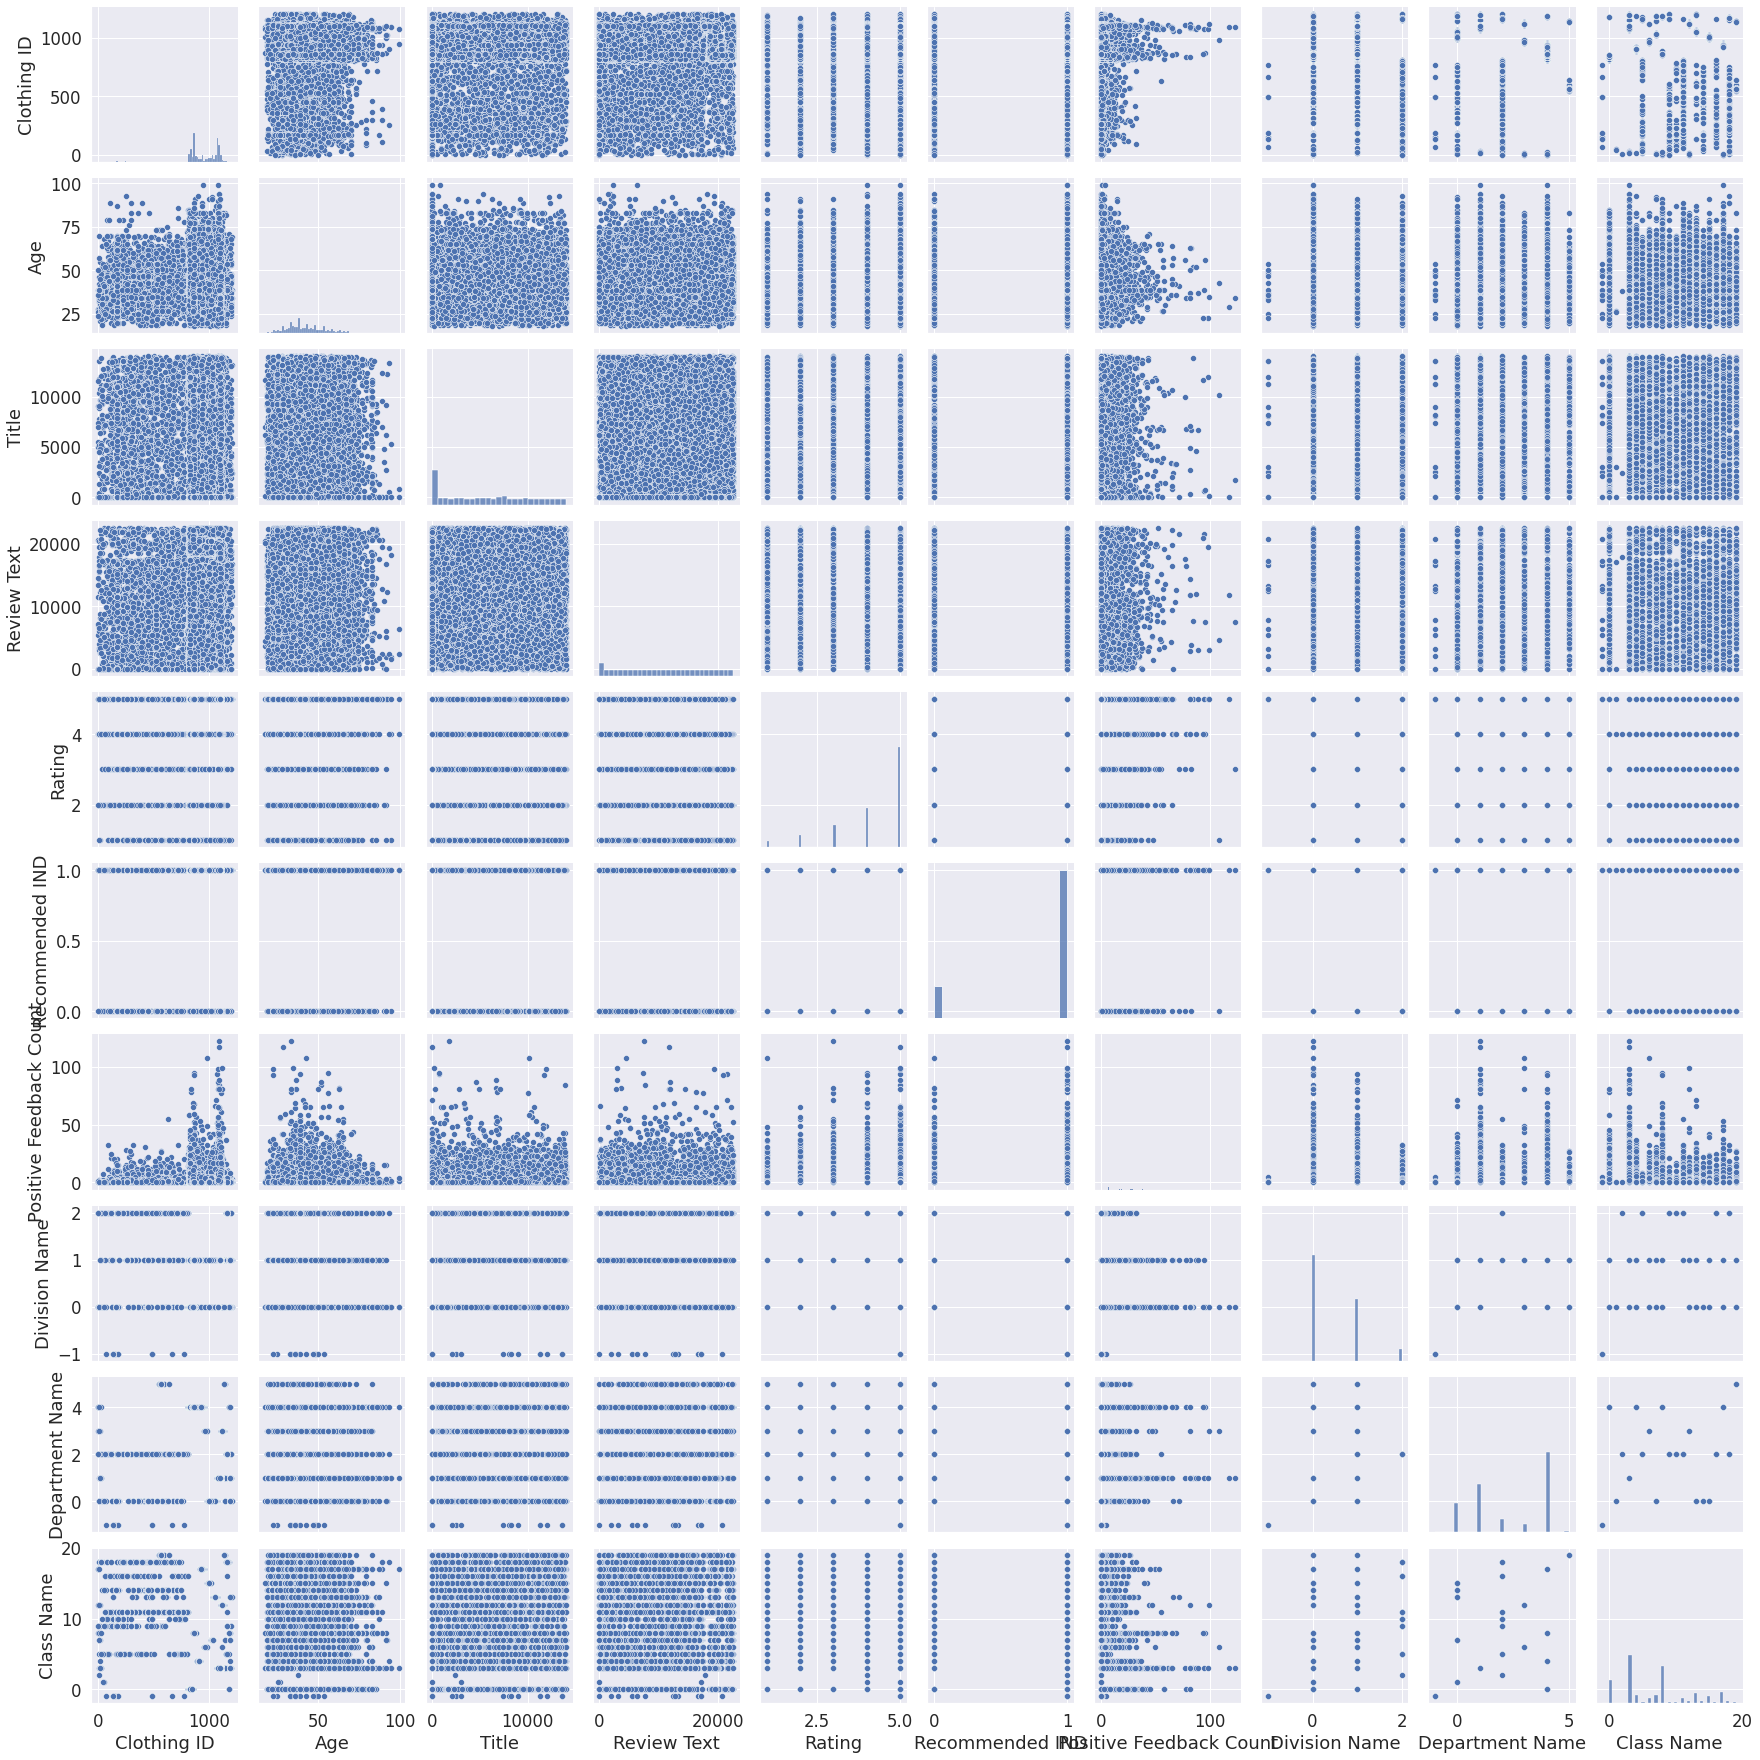

In [13]:
sns.pairplot(data)
plt.show()

## Heat Map to Check for Corelation between Features

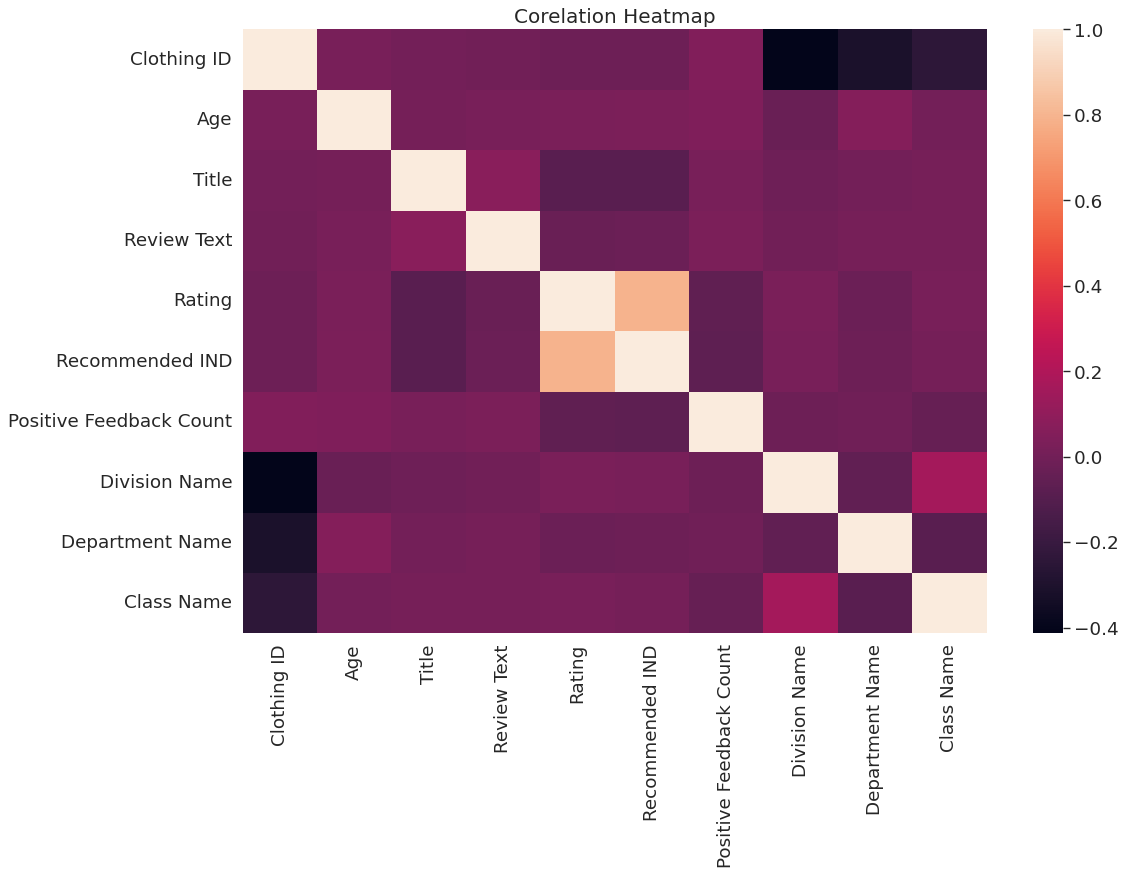

In [14]:
plt.rcParams["figure.dpi"] = 80
plt.rcParams["figure.figsize"] = (15, 10)
sns.heatmap(data.corr())
plt.title("Corelation Heatmap")
plt.show()

# Preparing Data

## Feature Scaling using StandardScaler

In [15]:
sc = StandardScaler()
scaled_data = data.copy()
scaled_data = sc.fit_transform(scaled_data)
data

Clothing ID  Age  Title  Review Text  Rating  Recommended IND  \
0              767   33     -1          245       4                1   
1             1080   34     -1        13177       5                1   
2             1077   60  11448         4925       3                0   
3             1049   50   8052         7405       5                1   
4              847   47   4362        20322       5                1   
...            ...  ...    ...          ...     ...              ...   
23481         1104   34   5301        11037       5                1   
23482          862   48  13792        12145       3                1   
23483         1104   31   3264        18497       3                0   
23484         1084   28  13173         3631       3                1   
23485         1104   52   9706        17684       5                1   

       Positive Feedback Count  Division Name  Department Name  Class Name  
0                            0              2                2           5  
1                            4              0                1           3  
2                            0              0                1           3  
3                            0              1                0          13  
4                            6              0                4           0  
...                        ...            ...              ...         ...  
23481                        0              1                1           3  
23482                        0              1                4           8  
23483                        1              1                1           3  
23484                        2              0                1           3  
23485                       22              1                1           3  

[23486 rows x 10 columns]

## Applying Principal Compnent Analysis

In [16]:
# Reducing the Number of Features in the Dataset using PCA
pca = PCA(2)
pca_data = pca.fit_transform(data)

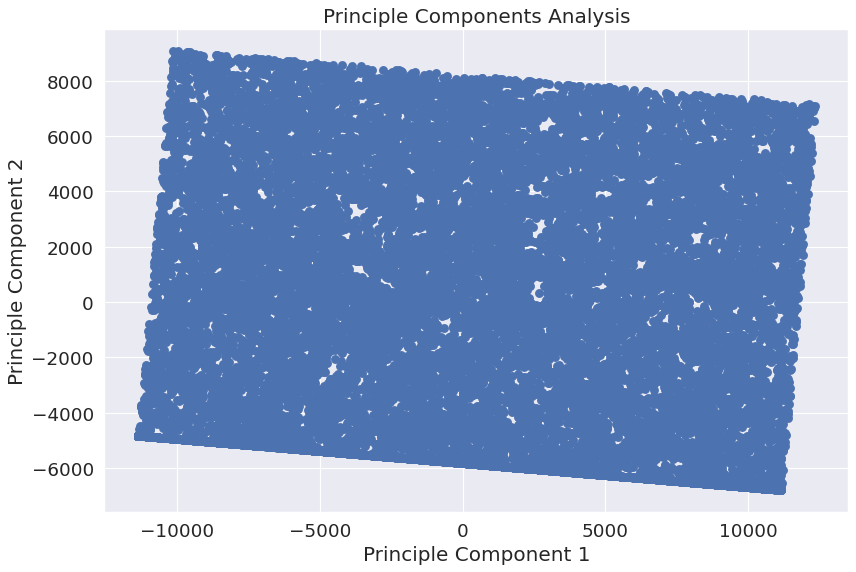

In [17]:
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["figure.dpi"] = 80
plt.scatter(x=pca_data[:,0], y=pca_data[:,1], lw=2)
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.title("Principle Components Analysis")
plt.show()

### It can be Observed and Predicted from the above plot that the data has 3 clusters

# KMeans Model

## Using Elbow Method to Find Appropriate number of clusters

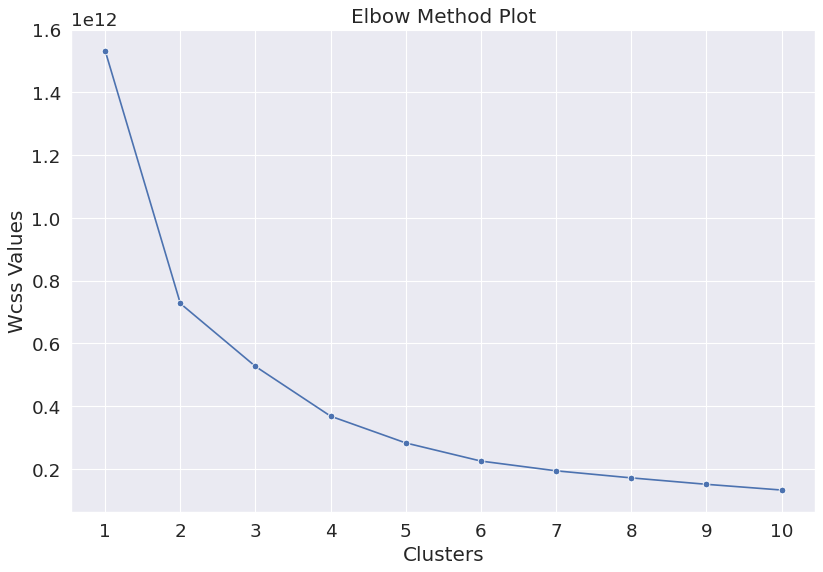

In [18]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(
        n_clusters = i,
        init = 'k-means++',
        random_state=42
    )
    kmeans.fit(data)
    wcss.append([i, kmeans.inertia_]) # kmeans.inertial_ returns the calculated WCSS Values
    
wcss_dataframe = pd.DataFrame(wcss, columns=["clusters", "wcss value"])

# Plot for Elbow Method
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["figure.dpi"] = 80
sns.lineplot(
    x = wcss_dataframe.clusters.values,
    y = wcss_dataframe["wcss value"], marker="o")
plt.xticks(np.arange(1, 11))
plt.xlabel("Clusters")
plt.ylabel("Wcss Values")
plt.title("Elbow Method Plot")
plt.show()

### From Elbow Method it is Clear that we have 3 Clusters

## Generating Our Dependent Variable using Kmeans

In [19]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = pd.Series(kmeans.fit_predict(data))
y_kmeans

0        1
1        0
2        2
3        2
4        0
        ..
23481    2
23482    2
23483    0
23484    2
23485    0
Length: 23486, dtype: int32

In [20]:
y_kmeans.value_counts()

0    10422
2     6551
1     6513
dtype: int64

## Centeroids

In [21]:
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)

# Visualizing Clusters

In [22]:
pca_dataframe = pd.DataFrame(pca_data, columns=["PCA 1", "PCA 2"])
pca_dataframe["Cluster"] = y_kmeans
pca_dataframe.sample(10)

PCA 1        PCA 2  Cluster
2551   -1791.787514  7177.567270        2
22082  -4748.172001 -4044.326279        1
17578  -7918.068003  8212.786554        2
12222   2690.281563  6856.621933        2
19854  -6881.750413  8321.313680        2
9318    3717.132379 -6149.438759        0
19098  -4164.357803  5693.711334        2
9823   -7550.628118 -2843.734349        1
12586  10627.389361   851.608983        0
11188   5687.813125 -3275.525581        0

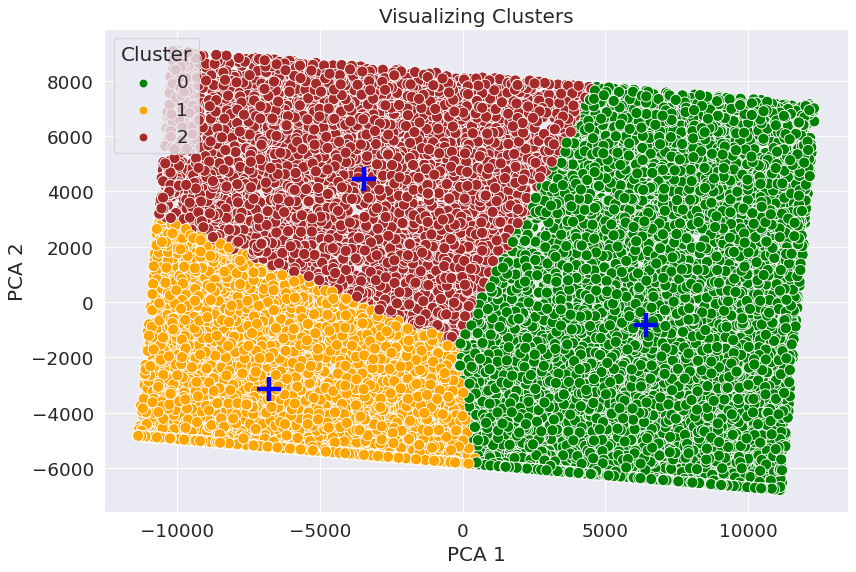

In [23]:
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["figure.dpi"] = 80
sns.scatterplot(x="PCA 1", y="PCA 2", hue="Cluster", data=pca_dataframe, palette=['green','orange','brown'], s=100)
plt.scatter(x=centroids_pca[:, 0], y=centroids_pca[:, 1], marker="+", s=500, linewidths=3, lw=4, color="blue", zorder=10)
plt.title("Visualizing Clusters")
plt.show()

In [24]:
data["Cluster"] = y_kmeans
data.head()

Clothing ID  Age  Title  Review Text  Rating  Recommended IND  \
0          767   33     -1          245       4                1   
1         1080   34     -1        13177       5                1   
2         1077   60  11448         4925       3                0   
3         1049   50   8052         7405       5                1   
4          847   47   4362        20322       5                1   

   Positive Feedback Count  Division Name  Department Name  Class Name  \
0                        0              2                2           5   
1                        4              0                1           3   
2                        0              0                1           3   
3                        0              1                0          13   
4                        6              0                4           0   

   Cluster  
0        1  
1        0  
2        2  
3        2  
4        0

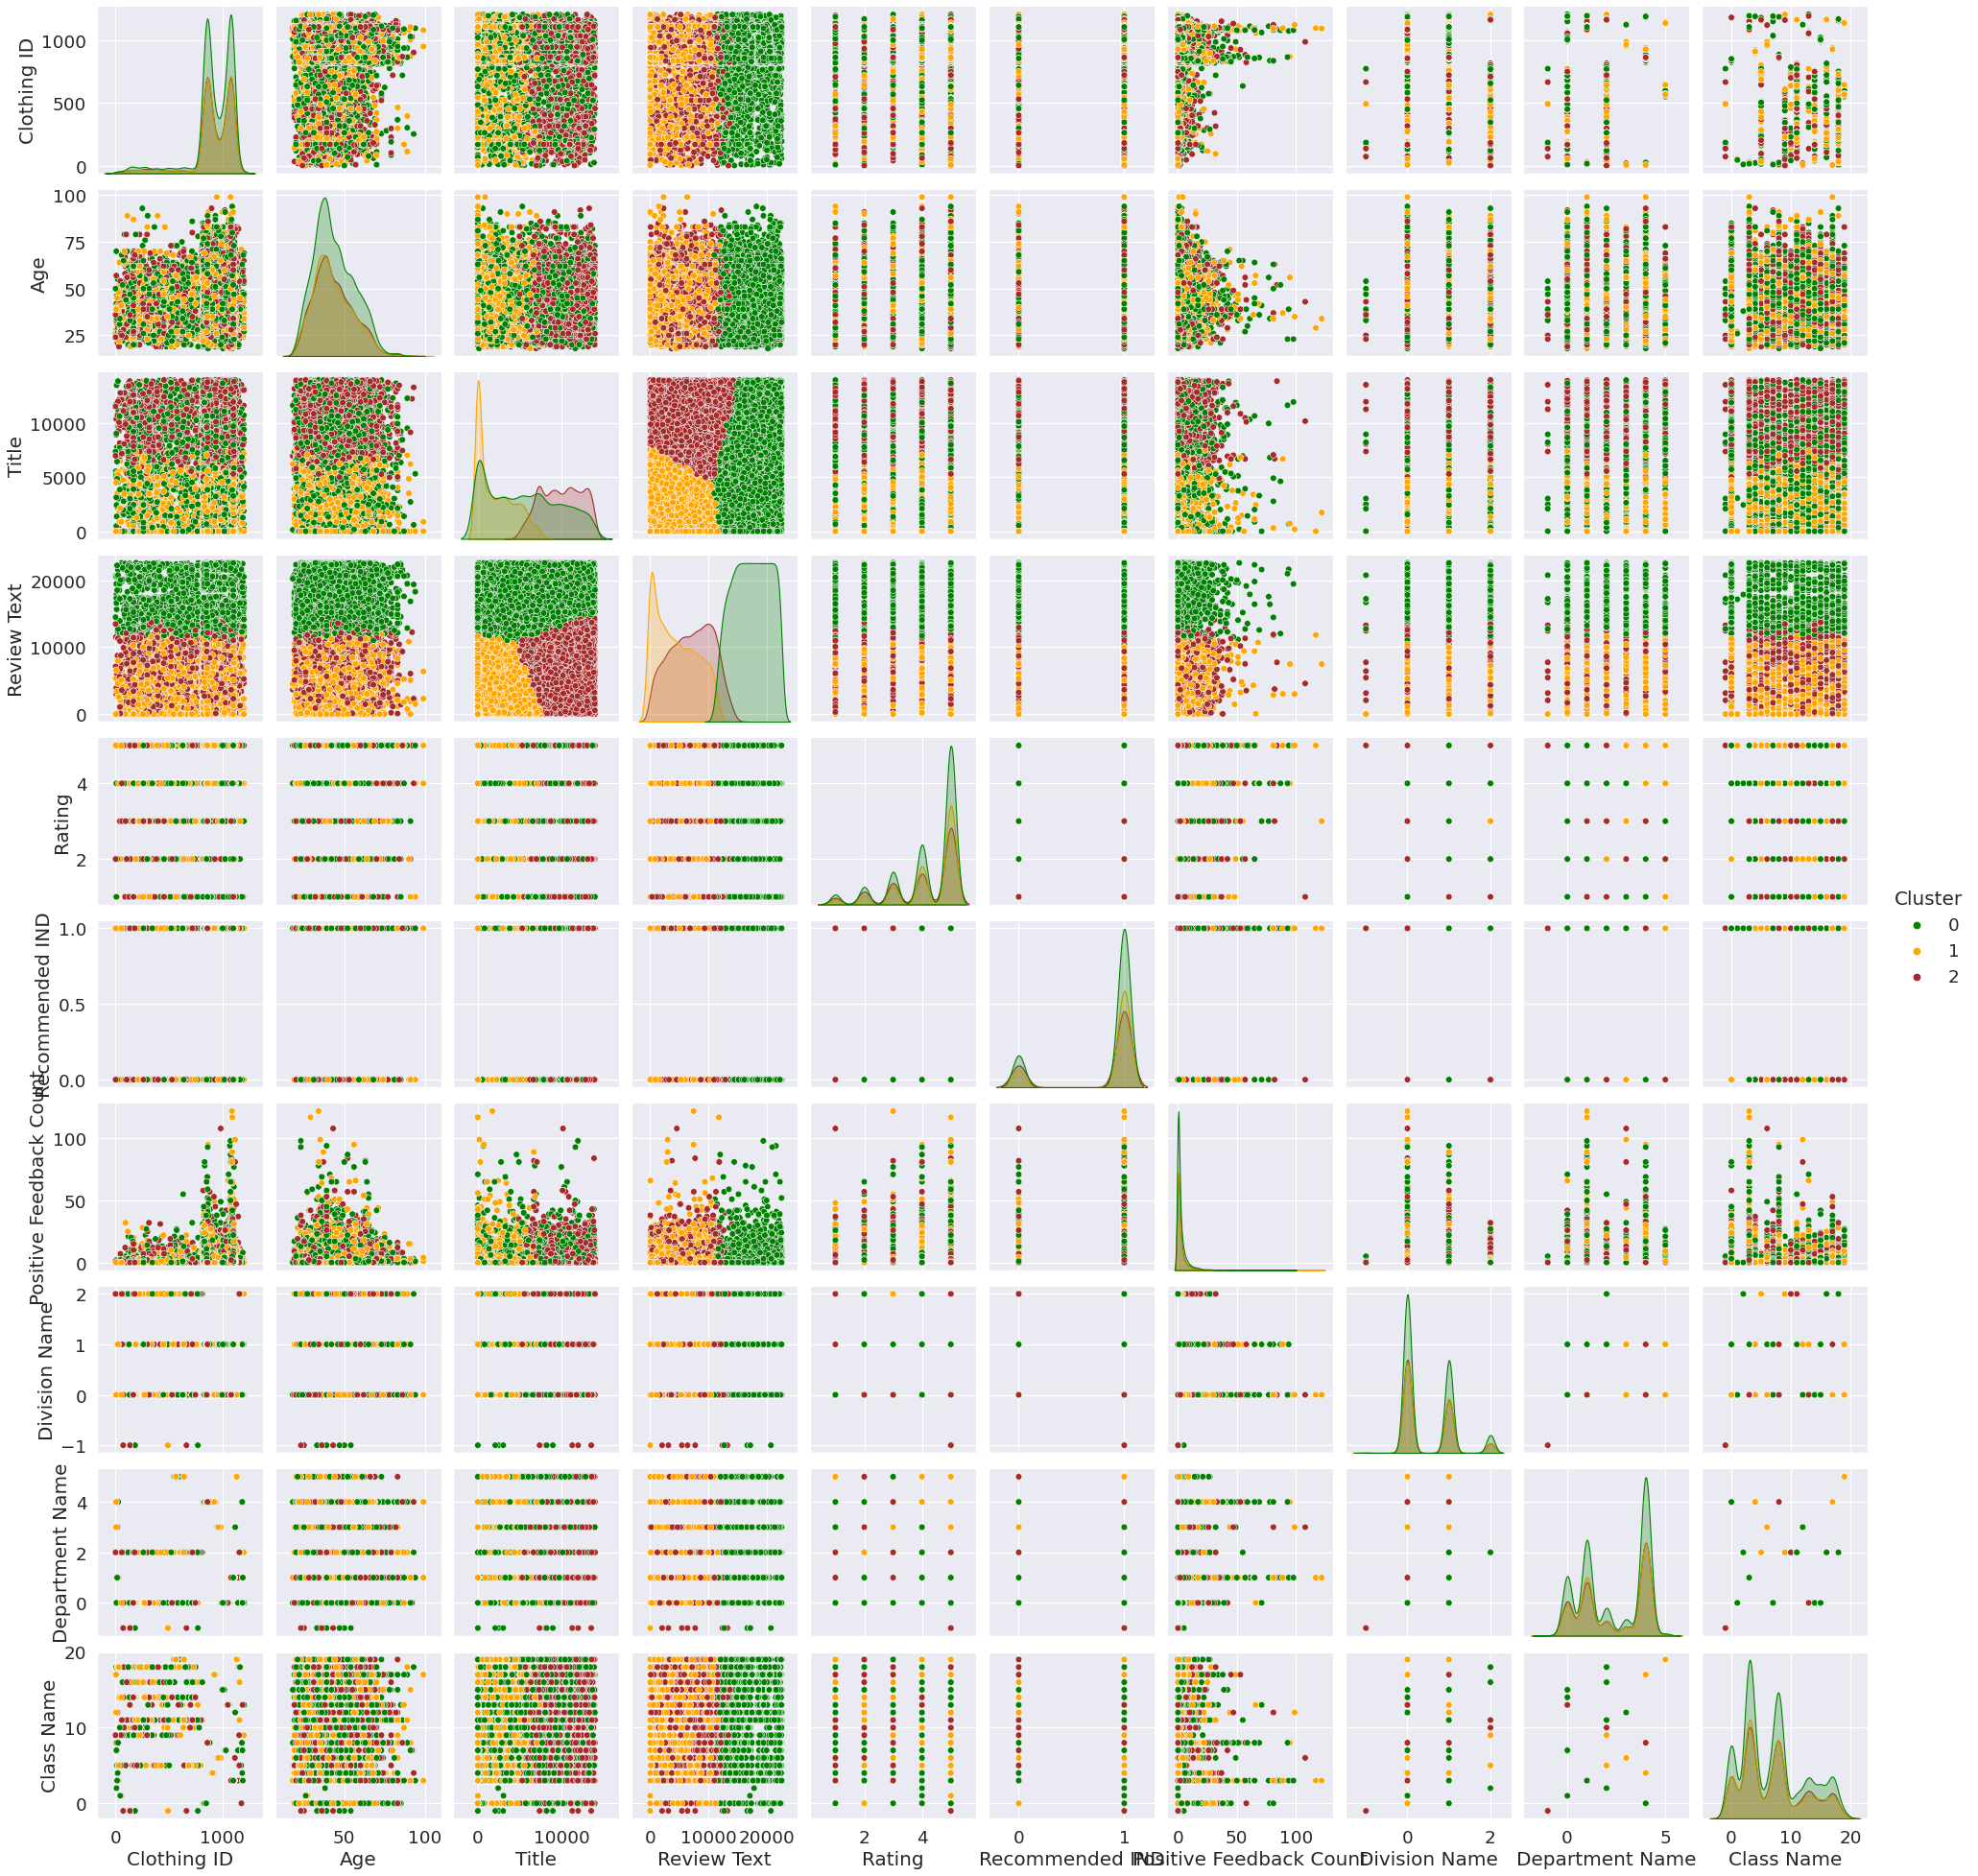

In [25]:
sns.pairplot(data, hue="Cluster", palette=['green','orange','brown'])
plt.show()